I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = 
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

In [128]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn. model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

## LOADING AND PROCESSING DATA

In [4]:
# load dataset

df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [26]:
df.shape

(6366, 10)

In [5]:
# We will add an target column named "affair" where 1 represents having affairs, 0 represents not
# This column can be determined from the "affairs" column.

df['affair'] = (df.affairs > 0).astype(int)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [14]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [16]:
for i in df.columns:
    print("The number of unqiue values for {} column is {} \n". format (i, df[i].value_counts().count()))

The number of unqiue values for rate_marriage column is 5 

The number of unqiue values for age column is 6 

The number of unqiue values for yrs_married column is 7 

The number of unqiue values for children column is 6 

The number of unqiue values for religious column is 4 

The number of unqiue values for educ column is 6 

The number of unqiue values for occupation column is 6 

The number of unqiue values for occupation_husb column is 6 

The number of unqiue values for affairs column is 77 

The number of unqiue values for affair column is 2 



Since there seem to be many categorical type columns, it would be better to explore their values.

In [25]:
for i in df.columns:
    print("The number of unqiue values for {} column is: ".format(i))
    print(df[i].value_counts())
    print("\n")

The number of unqiue values for rate_marriage column is: 
5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64


The number of unqiue values for age column is: 
27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64


The number of unqiue values for yrs_married column is: 
2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64


The number of unqiue values for children column is: 
0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64


The number of unqiue values for religious column is: 
3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64


The number of unqiue values for educ column is: 
14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64


The number of unqiue values for occupation column is: 
3.0    2783
4.

Analysis:
    
1. There are no null values.
2. rate_marriage is categorical with 5 rating values.
3. religion is categorical with 4 rating values.
4. Similarly, variables such as educ, occupation, occupation_husb are also categorical.
5. The data is imbalanced since affair column has twice the data for 0 value.

## DATA EXPLORATION

In [28]:
# Average of all features group by affair

df.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


On average, women with affair(s) rate their marriage lower. They are also married for a longer time.

In [29]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


A clear trend is shown, women who are married (and also older) for longer rate their marriage lower.

In [30]:
df.groupby('religious').mean()

,rate_marriage,age,yrs_married,children,educ,occupation,occupation_husb,affairs,affair
religious,,,,,,,,,
1.0,4.077375,27.704212,7.439765,1.041626,14.441724,3.431929,3.902057,1.246989,0.399608
2.0,4.021173,28.618218,8.650640,1.334804,13.985002,3.369210,3.820026,0.767282,0.361270
3.0,4.141206,29.536953,9.436416,1.492981,14.175475,3.439306,3.828241,0.545039,0.291908
4.0,4.349085,31.157774,11.115854,1.809451,14.753049,3.545732,3.954268,0.240431,0.181402


Women who are longer married and having more children seem to be more religious. However, surprisingly, this does not show a huge impact on marriage rating although more religious women tend to rate their marriages higher.

In [33]:
df.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Key takeaways from the above stats:
    
Women with low marriage_rate tend to spend more time on affairs. These women are also older and married for longer time (comparatively).

In [35]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


Text(0.5, 1.0, 'Age vs affair')

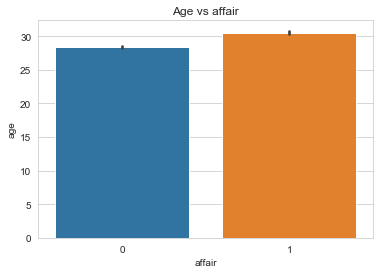

In [38]:
sns.set_style("whitegrid")

sns.barplot(x="affair", y="age", data=df)
plt.title("Age vs affair")

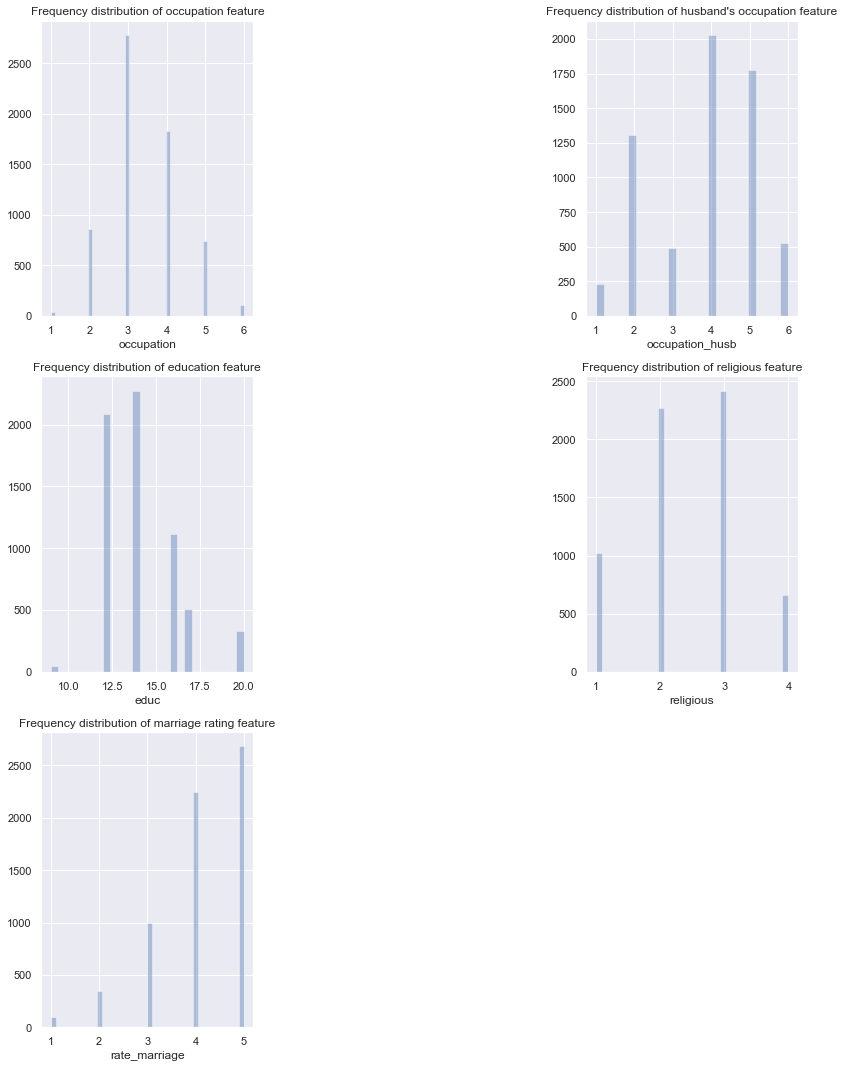

In [51]:
sns.set(rc={'figure.figsize':(12, 15)})

plt.subplot(3,3,1)
sns.distplot(df["occupation"], kde = False)
plt.title("Frequency distribution of occupation feature")

plt.subplot(3,3,3)
sns.distplot(df["occupation_husb"], kde = False)
plt.title("Frequency distribution of husband's occupation feature")

plt.subplot(3,3,4)
sns.distplot(df["educ"], kde = False)
plt.title("Frequency distribution of education feature")

plt.subplot(3,3,6)
sns.distplot(df["religious"], kde = False)
plt.title("Frequency distribution of religious feature")

plt.subplot(3,3,7)
sns.distplot(df["rate_marriage"], kde = False)
plt.title("Frequency distribution of marriage rating feature")

plt.tight_layout()

Text(0, 0.5, 'Frequency')

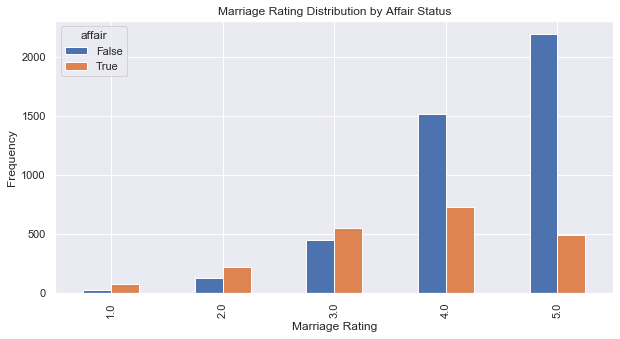

In [55]:
# barplot of marriage rating grouped by affair (True or False)

sns.set(rc={'figure.figsize':(10, 5)})
pd.crosstab(df.rate_marriage, df.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

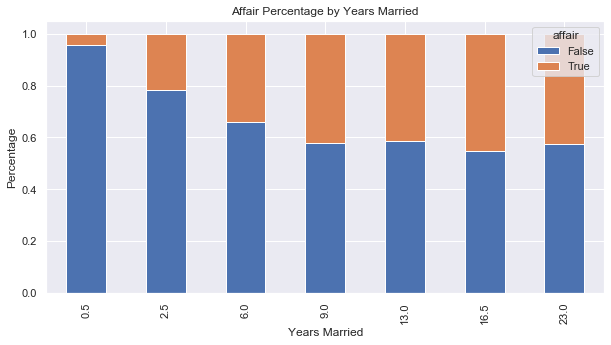

In [56]:
# Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

affair_yrs_married = pd.crosstab(df.yrs_married, df.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

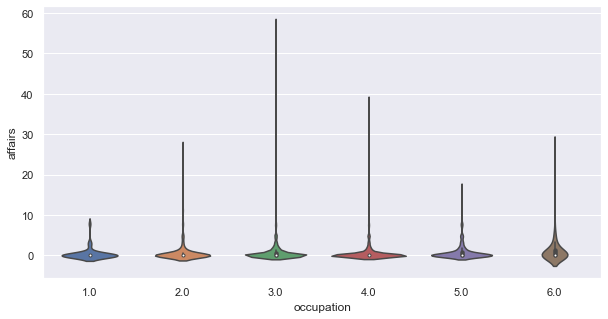

In [60]:
sns.violinplot(x = "occupation", y = "affairs", data = df)

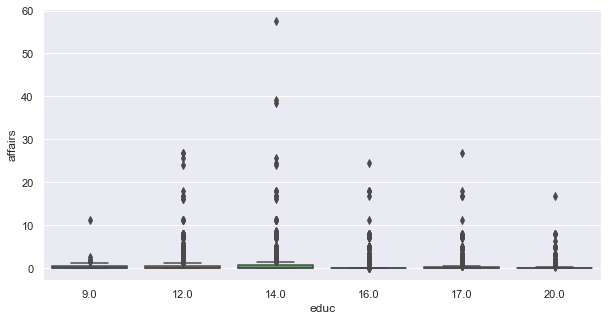

In [65]:
sns.boxplot(x = "educ", y = "affairs", data = df)

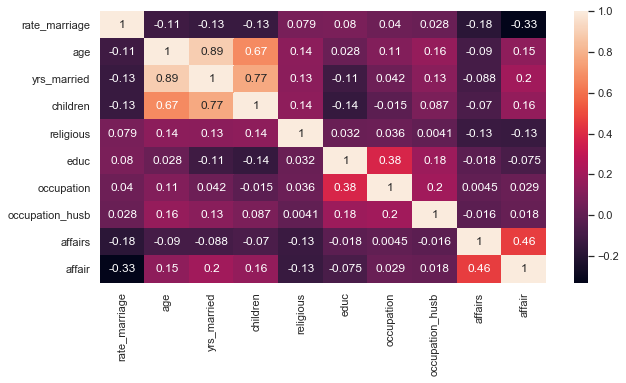

In [66]:
sns.heatmap(df.corr(), annot = True)

Analysis:

Years married and age have high positive correlation which is expected.

Years married and children have positive correlation since longer marriage are expected to have more children.

Same with age and children.

## DATA PREPERATION

In [71]:
# create dataframes with an intercept column and dummy variables for occupation, edu, religion, rate_marriage
# and occupation_husb since they all are categorical

# We are dropping affairs column since it will leak data.

y, X = dmatrices('affair ~ C(rate_marriage) + age + yrs_married + children + \
                  C(religious) + C(educ) + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")
X.columns

Index(['Intercept', 'C(rate_marriage)[T.2.0]', 'C(rate_marriage)[T.3.0]',
       'C(rate_marriage)[T.4.0]', 'C(rate_marriage)[T.5.0]',
       'C(religious)[T.2.0]', 'C(religious)[T.3.0]', 'C(religious)[T.4.0]',
       'C(educ)[T.12.0]', 'C(educ)[T.14.0]', 'C(educ)[T.16.0]',
       'C(educ)[T.17.0]', 'C(educ)[T.20.0]', 'C(occupation)[T.2.0]',
       'C(occupation)[T.3.0]', 'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]',
       'C(occupation)[T.6.0]', 'C(occupation_husb)[T.2.0]',
       'C(occupation_husb)[T.3.0]', 'C(occupation_husb)[T.4.0]',
       'C(occupation_husb)[T.5.0]', 'C(occupation_husb)[T.6.0]', 'age',
       'yrs_married', 'children'],
      dtype='object')

In [72]:
# fix column names of X

X = X.rename(columns = {'C(rate_marriage)[T.2.0]' : 'rate_marr_2',
                        'C(rate_marriage)[T.3.0]' : 'rate_marr_3',
                        'C(rate_marriage)[T.4.0]' : 'rate_marr_4',
                        'C(rate_marriage)[T.5.0]' : 'rate_marr_5',
                        'C(religious)[T.2.0]' : 'religious_2',
                        'C(religious)[T.3.0]' : 'religious_3',
                        'C(religious)[T.4.0]' : 'religious_4',
                        'C(educ)[T.12.0]' : 'educ_12',
                        'C(educ)[T.14.0]' : 'educ_14',
                        'C(educ)[T.16.0]' : 'educ_16',
                        'C(educ)[T.17.0]' : 'educ_17',
                        'C(educ)[T.20.0]' : 'educ_20',
                        'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [73]:
X.head()

,Intercept,rate_marr_2,rate_marr_3,rate_marr_4,rate_marr_5,religious_2,religious_3,religious_4,educ_12,educ_14,...,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,9.0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,13.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,2.5,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,16.5,4.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,9.0,1.0


If using a formula to specify the terms to include, remember that like any formula, the intercept term will be included by default, so use 0 or -1 in your formula if you want to avoid this.

The intercept term contains some extra metadata attached which can be ignored if not required.

In [81]:
X.Intercept.value_counts()

1.0    6366
Name: Intercept, dtype: int64

In [82]:
# Since all the intercept terms are with value 1, we can alltogether drop this column.

X = X.drop("Intercept", axis = 1)

In [84]:
X.columns

Index(['rate_marr_2', 'rate_marr_3', 'rate_marr_4', 'rate_marr_5',
       'religious_2', 'religious_3', 'religious_4', 'educ_12', 'educ_14',
       'educ_16', 'educ_17', 'educ_20', 'occ_2', 'occ_3', 'occ_4', 'occ_5',
       'occ_6', 'occ_husb_2', 'occ_husb_3', 'occ_husb_4', 'occ_husb_5',
       'occ_husb_6', 'age', 'yrs_married', 'children'],
      dtype='object')

In [75]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [77]:
# flatten y into a 1-D array for sklearn 

y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

## DATA MODELLING

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [89]:
# instantiate a logistic regression model, and fit with X and y

model = LogisticRegression(max_iter = 1000)
model = model.fit(x_train, y_train)

In [106]:
# examine the coefficients
cols = x_train.columns

for i in range(25):
    print("The co-efficient for {} column is {}".format(cols[i], np.transpose(model.coef_)[i]))

The co-efficient for rate_marr_2 column is [-0.14026176]
The co-efficient for rate_marr_3 column is [-0.44672644]
The co-efficient for rate_marr_4 column is [-1.34523524]
The co-efficient for rate_marr_5 column is [-1.98548194]
The co-efficient for religious_2 column is [-0.25666139]
The co-efficient for religious_3 column is [-0.59381245]
The co-efficient for religious_4 column is [-1.21203419]
The co-efficient for educ_12 column is [-0.06270663]
The co-efficient for educ_14 column is [0.14079918]
The co-efficient for educ_16 column is [-0.08400065]
The co-efficient for educ_17 column is [0.06808649]
The co-efficient for educ_20 column is [-0.01470713]
The co-efficient for occ_2 column is [0.05179305]
The co-efficient for occ_3 column is [0.38447955]
The co-efficient for occ_4 column is [0.1489423]
The co-efficient for occ_5 column is [0.69952473]
The co-efficient for occ_6 column is [0.87825145]
The co-efficient for occ_husb_2 column is [0.18014548]
The co-efficient for occ_husb_3 co

In [107]:
# check the accuracy on the training set
model.score(x_train, y_train)

0.7304147465437788

In [110]:
predicted = model.predict(x_test)
predicted

array([0., 1., 0., ..., 0., 0., 0.])

In [108]:
model.score(x_test, y_test)
# print(metrics.accuracy_score(y_test, predicted))

0.7242462311557789

In [112]:
print(metrics.confusion_matrix(y_test, predicted))
print("\n \n")
print(metrics.classification_report(y_test, predicted))

[[941 114]
 [325 212]]

 

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81      1055
         1.0       0.65      0.39      0.49       537

    accuracy                           0.72      1592
   macro avg       0.70      0.64      0.65      1592
weighted avg       0.71      0.72      0.70      1592



In [122]:
# evaluate the model using 10-fold cross-validation

grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_cv = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid = grid_values, scoring='accuracy', cv=10)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [125]:
y_pred_acc = grid_cv.predict(x_test)

In [129]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.7242462311557789
Precision Score : 0.649390243902439
Recall Score : 0.39664804469273746
F1 Score : 0.492485549132948


The best accuracy we can have is 72.42 with the tuned parameters above.